<a href="https://colab.research.google.com/github/KDev-Huh/Deep_learning/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%9D%98_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>선형 회귀</h1>
<p>1.선형회귀는 2차원 평면에 놓인 점을 표현하는 1차 함수의 기울기와 절편을 찾아줍니다.<br>
2.선형 회귀로 찾은 이런 1차 함수를 모델이라고 부릅니다.<br>
3.선형 회귀 모델로 새 값 x에 대하여 y를 예측할 수 있습니다.</p>

In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
# shape는 배열의 크기를 가지고 있다. 배열의 크기 출력해보기
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [ ]:
# 입력 데이터 예시 보기
diabetes.data[0:3]
# 타깃 데이터 예시 보기
diabetes.target[:3]

array([151.,  75., 141.])

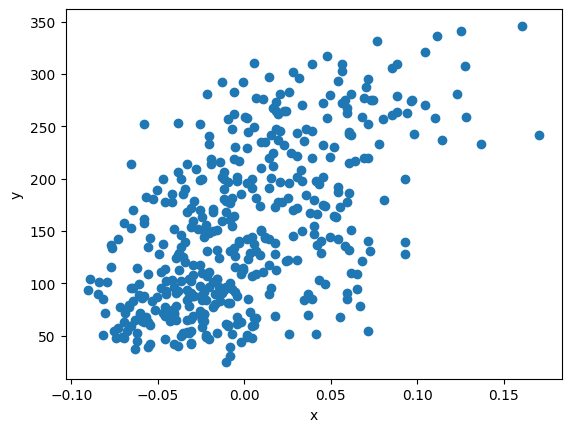

In [ ]:
# 당뇨병 환자 데이터 시각화 하기
# 모든 특성을 그래프로 표현할 수 없기 때문에 3번째 특성고 타깃 데이터로 산점도를 그린것이다.
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# x, y에 입력과 타깃 저장하기
x = diabetes.data[:, 2]
y = diabetes.target

<h1>경사하강법으로 모델학습</h1>
<h3>y = ax + b 에서의 a(w)와 b를 찾기 위한 방법은 다음과 같다.</h3>
<p>1. 무작위로 w와 b를 정한다.<br>
2. x에서 샘플 하나를 선택하여 y를 계산한다.<br>
3. y와 선택한 샘플의 진짜 y를 비교한다.<br>
4. y이 진짜 y와 더 가까워 지도록 w,b 를 조정한다.<br>
5. 모든 샘플을 처리할 때까지 다시 2~4 항목을 반복한다.</p>

In [ ]:
# 가중치와 절편 초기화
w = 1.0
b = 1.0

In [ ]:
y_hat = x[0] * w + b
print(y_hat)
# 1.0616962065186832

1.0616962065186832


In [ ]:
print(y[0])
# 151.0

151.0


In [ ]:
# w값 조절해 예측값 바꾸기
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc +b
print(y_hat_inc)
# 1.0678658271705517

1.0678658271705517


In [ ]:
# 변화율
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)
#0.06169620651868429

0.06169620651868429


<h1>변화율 = x[0]</h1>

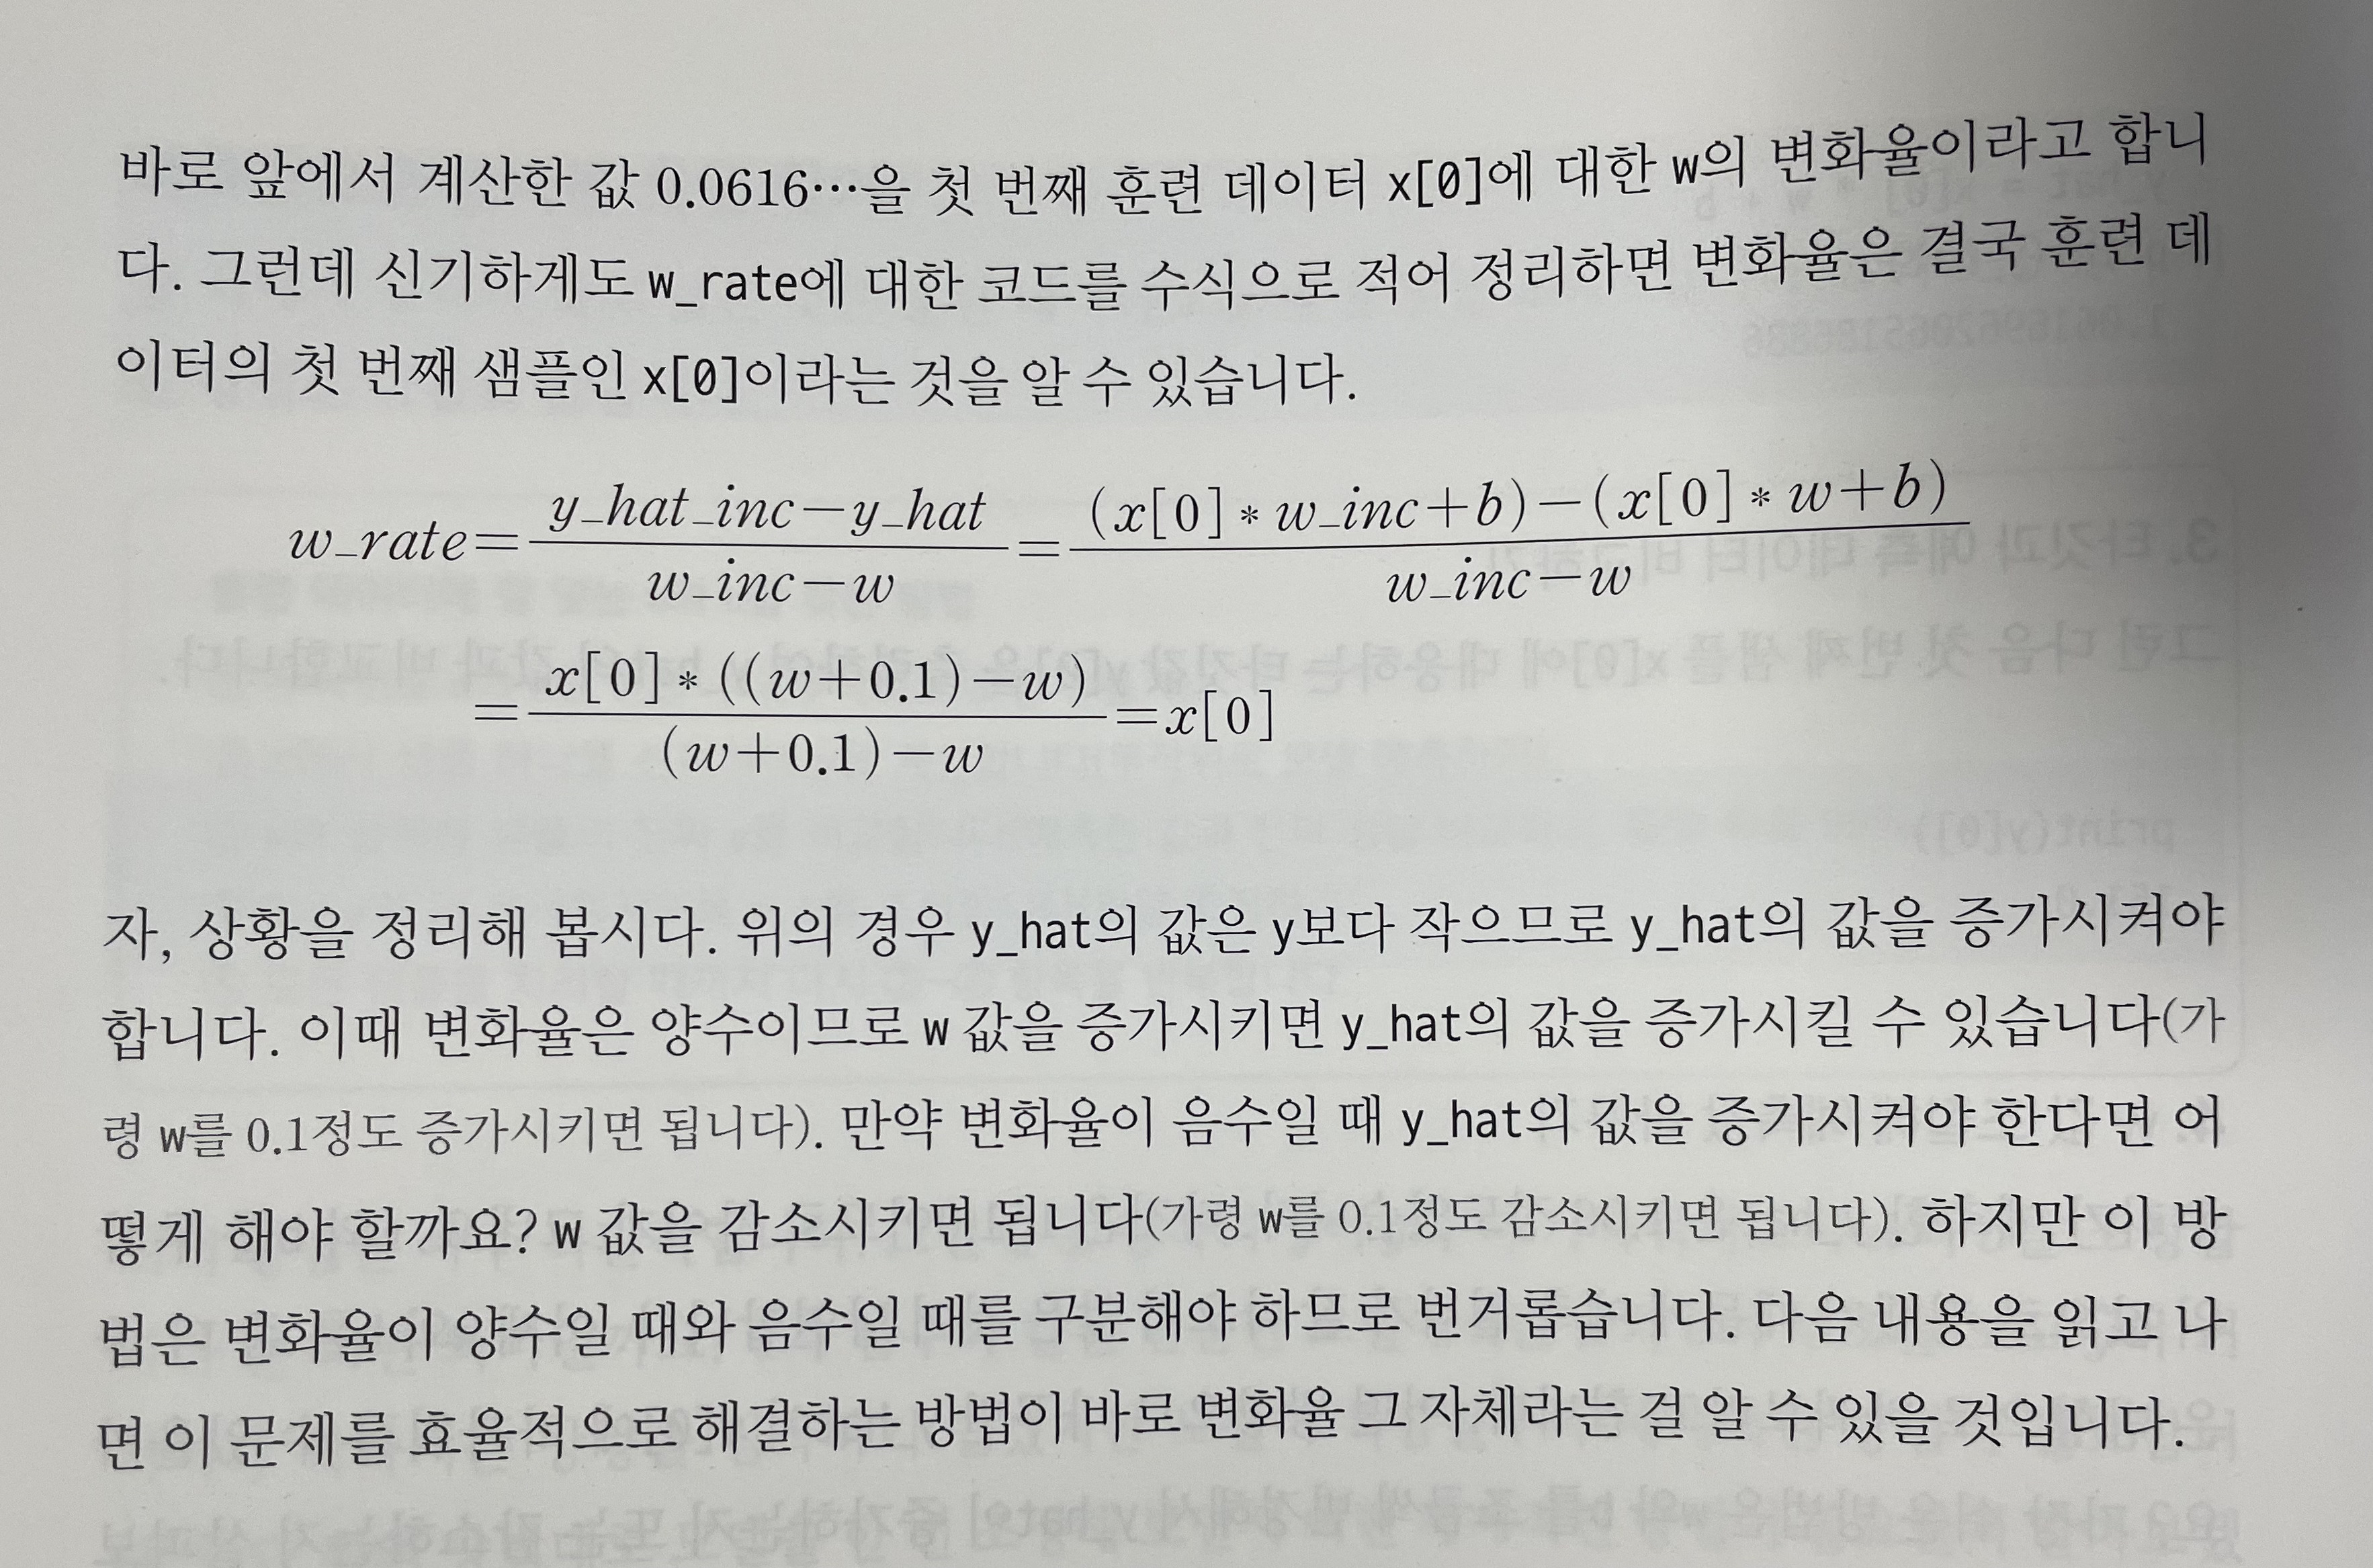

In [ ]:
#변화율로 가중치 업데이트하기
# 변화율이 음수이든 양수이든 더해주면 w_hat의 값을 증가 시킬 수 있다.
w_new = w + w_rate
print(w_new)
#1.0616962065186843

1.0616962065186843


In [ ]:
# 변화율로 절편 업데이트하기
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat)
# 1.0616962065186832

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)
# 1.0

1.0616962065186832
1.0


<h1>변화율의 값을 보니 1이다. 즉 b가 1 만큼 증가하면 y_hat도 1만큼 증가한다.</h1>

In [ ]:
b_new = b + 1
print(b_new)

2.0


<h1>이 방법을 사용했을때의 문제점</h1>
<p>1. y_hat이 y에 한참 미치지 못 하는 값인 경우, w와 b를 더 큰 폭으로 수정 할 수 없습니다.<br>
2. y_hat이 y보다 커지면 y_hat을 감소시키지 못한다.</p>

In [ ]:
# 오차와 변화율을 곱하여 가중치 업데이트 하기
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)
# 10.250624555903848 150.9383037934813

10.250624555903848 150.9383037934813


In [ ]:
# 두번째 샘플 데이터로 새로운 w 와 b를 구하기
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)
# 14.132317616380695 75.52764127612656

14.132317616380695 75.52764127612656


In [ ]:
# 전체 샘플을 반복하기
for x_i, y_i in zip(x, y):
  y_hat = x_i * w + b
  err = y_i - y_hat
  w_rate = x_i
  w = w + w_rate * err
  b = b + 1 * err
print(w, b)
# 587.8654539985616 99.4093556453094

587.8654539985616 99.4093556453094


<function matplotlib.pyplot.show(close=None, block=None)>

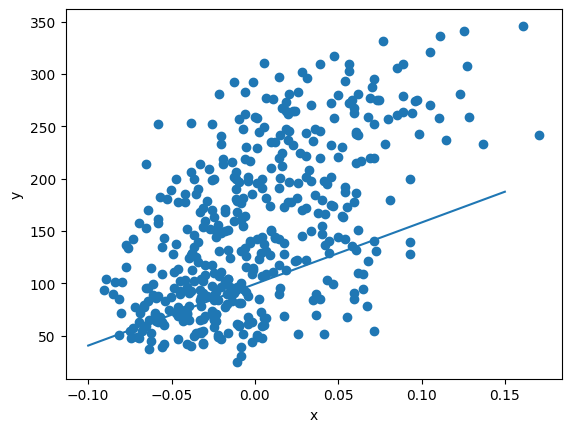

In [ ]:
# 데이터로 학습시키고 찾은 w와 b로 예측 한 모델 시각화 하기
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show

In [ ]:
# 여러 에포크를 반복하기
for i in range(1, 100):
  for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)
# 913.5973364346786 123.39414383177173

913.5973364346786 123.39414383177173


<function matplotlib.pyplot.show(close=None, block=None)>

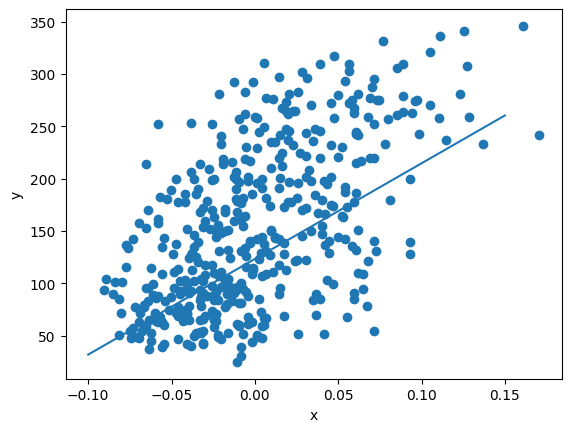

In [ ]:
# 여러번 학습 시켜 보다 정확해진 모델
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show

In [ ]:
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)
# 287.8416643900139

287.8416643900139


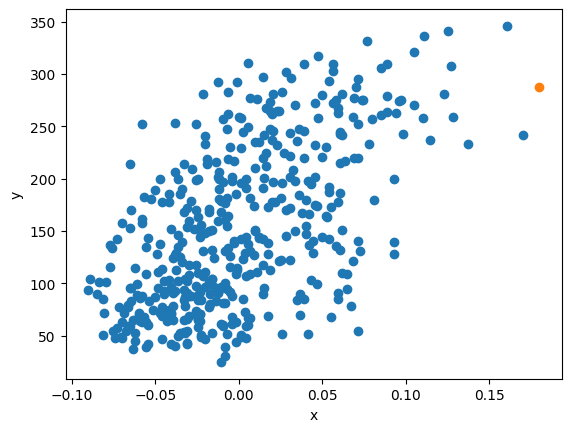

In [ ]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<h1>Neuron클래스 생성</h1>

In [ ]:
class Neuron:
  def __init__(self):
    # 가중치와 절편 초기화
    self.w = 1.0
    self.b = 1.0

  def forpass(self, x):
    # 직선의 방정식으로 yhat(예측값)을 계산한다.
    y_hat = x * self.w + self.b
    return y_hat

  def backprop(self, x, err):
    # 가중치와 절편의 그레이디언트를 계산한다.
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def fit(self, x, y, epochs=100):
    for i in range(epochs):
      for x_i, y_i in zip(x, y):  # 모든 샘플에 대해 반복
        y_hat = self.forpass(x_i) # 정방향 계산
        err = -(y_i - y_hat)      # 오차 계산
        w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
        self.w -= w_grad          # 가중치 업데이트
        self.b -= b_grad          # 절편 업데이트

In [ ]:
neuron = Neuron()
neuron.fit(x, y)

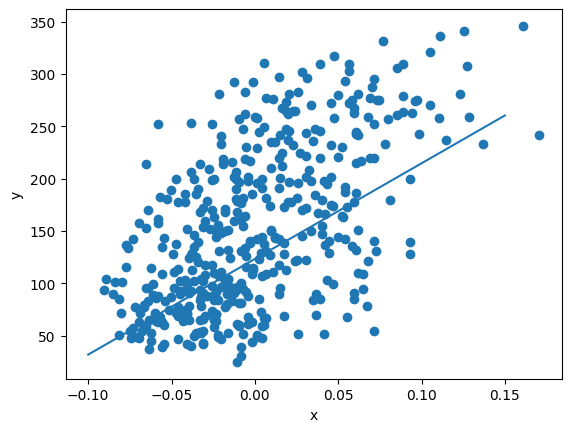

In [ ]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()